In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn. metrics import roc_curve, auc
import numpy as np
import random
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
from sklearn. metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

In [2]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [3]:
data = pd.read_excel("C:\\Users\\12292\\Desktop\\train size - xx (2).xlsx")

In [4]:
train_X = data.iloc[:, 1:]  # Features (excluding the first column)
train_y = data.iloc[:, 0] 

In [5]:
data_test = pd.read_excel("C:\\Users\\12292\\Desktop\\test size - xx (2).xlsx")

In [6]:
test_y = data_test.iloc[:, 0] 
test_X = data_test.iloc[:, 1:] 
test_X

,BNF,PHASES,Radscore
0,1.599177,6,-0.199217
1,1.277627,4,0.417314
2,0.932445,1,-0.781816
3,0.956438,5,-0.183729
4,1.548727,3,-0.510796
...,...,...,...
137,1.190633,4,-1.118190
138,1.035633,0,-1.140353
139,1.178697,4,1.206319
140,1.069052,0,-1.283198


In [7]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

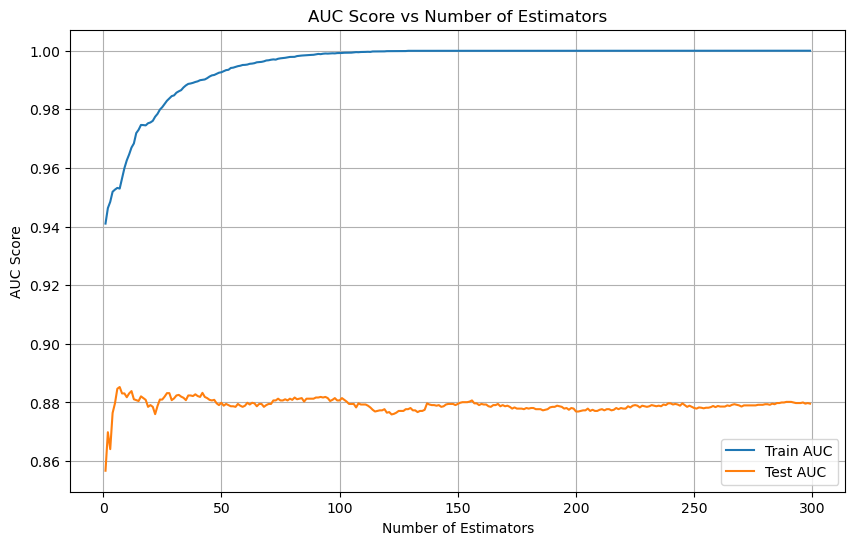

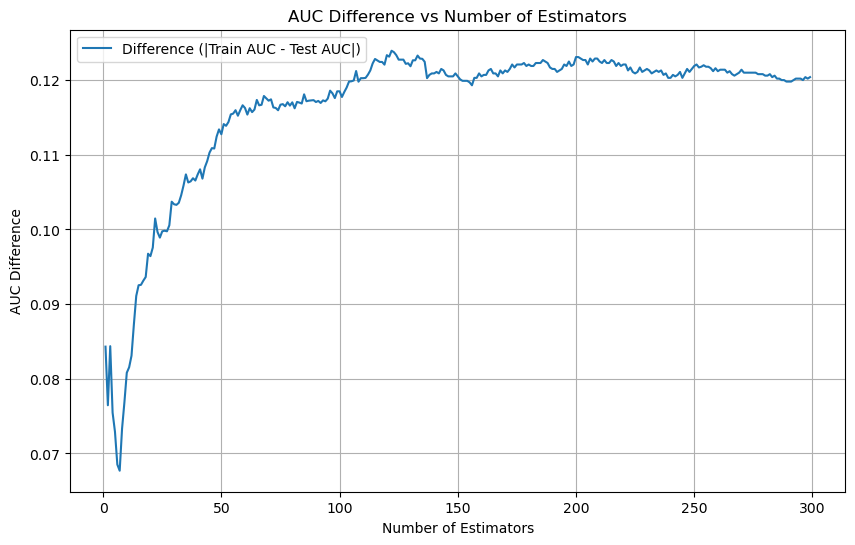

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# Initialize lists to store results
auc_train_scores = []
auc_test_scores = []
auc_diff_scores = [] 
n_estimators_range = range(1, 300)

for i in n_estimators_range:
    # Train XGBoost model
    model = xgb.XGBClassifier(
        n_estimators=i,
        learning_rate =0.1
    )
    model.fit(train_X, train_y)

    # Calculate AUC for train set
    train_pred_prob = model.predict_proba(train_X)[:, 1]
    auc_train = roc_auc_score(train_y, train_pred_prob)
    auc_train_scores.append(auc_train)

    # Calculate AUC for test set
    test_pred_prob = model.predict_proba(test_X)[:, 1]
    auc_test = roc_auc_score(test_y, test_pred_prob)
    auc_test_scores.append(auc_test)

    auc_diff = np.abs(auc_train - auc_test)
    auc_diff_scores.append(auc_diff)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, auc_train_scores, label='Train AUC')
plt.plot(n_estimators_range, auc_test_scores, label='Test AUC')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()


# Plot the AUC difference
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, auc_diff_scores, label='Difference (|Train AUC - Test AUC|)')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Difference')
plt.title('AUC Difference vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
sorted_indices = np.argsort(auc_diff_scores)
top_50_indices = sorted_indices[:30]

top_50_estimators = [n_estimators_range[i] for i in top_50_indices]
top_50_diff_scores = [auc_diff_scores[i] for i in top_50_indices]

print("Top 50 points with minimum AUC difference:")
for i in range(len(top_50_estimators)):
    print("Point", i+1, "- Number of Estimators:", top_50_estimators[i], ", AUC Difference:", top_50_diff_scores[i])


Top 50 points with minimum AUC difference:
Point 1 - Number of Estimators: 7 , AUC Difference: 0.06769250084883904
Point 2 - Number of Estimators: 6 , AUC Difference: 0.06852724527461451
Point 3 - Number of Estimators: 5 , AUC Difference: 0.07291718934404134
Point 4 - Number of Estimators: 8 , AUC Difference: 0.07331948988871761
Point 5 - Number of Estimators: 4 , AUC Difference: 0.07546929604774033
Point 6 - Number of Estimators: 2 , AUC Difference: 0.07645896040971367
Point 7 - Number of Estimators: 9 , AUC Difference: 0.07686714551010587
Point 8 - Number of Estimators: 10 , AUC Difference: 0.08081227612213226
Point 9 - Number of Estimators: 11 , AUC Difference: 0.08154858797956654
Point 10 - Number of Estimators: 12 , AUC Difference: 0.08309328931379967
Point 11 - Number of Estimators: 1 , AUC Difference: 0.08430837910513267
Point 12 - Number of Estimators: 3 , AUC Difference: 0.08436967019194141
Point 13 - Number of Estimators: 13 , AUC Difference: 0.08726916219866221
Point 14 - Nu

In [10]:
#Choose an appropriate `n_estimators` that is neither too small nor too large for efficient computation in the subsequent tasks.
best_model_XGB = xgb.XGBClassifier(n_estimators=40, learning_rate =0.1)

best_model_XGB.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [11]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Define the XGBClassifier with initial parameters
best_model_XGB = xgb.XGBClassifier(n_estimators=40, learning_rate=0.1)

# Define the updated grid of hyperparameters to search
param_grid = {
    'max_depth': list(range(2, 15)),  # Adjust the range according to your preference
    'min_child_weight': list(range(2, 15))  # Adjust the range according to your preference
}

# Create empty dictionaries to store AUC values
train_auc_dict = {}
val_auc_dict = {}

# Iterate over each combination of hyperparameters
for max_depth in param_grid['max_depth']:
    for min_child_weight in param_grid['min_child_weight']:
        print(f"Training with max_depth={max_depth} and min_child_weight={min_child_weight}")
        
        # Set the hyperparameters and train the model
        best_model_XGB.set_params(max_depth=max_depth, min_child_weight=min_child_weight)
        best_model_XGB.fit(train_X, train_y)
        
        # Predict probabilities for training and validation data
        train_probs = best_model_XGB.predict_proba(train_X)[:, 1]
        val_probs = best_model_XGB.predict_proba(test_X)[:, 1]
        
        # Calculate AUC for training and validation data
        train_auc = roc_auc_score(train_y, train_probs)
        val_auc = roc_auc_score(test_y, val_probs)
        
        # Store AUC values in dictionaries
        train_auc_dict[(max_depth, min_child_weight)] = train_auc
        val_auc_dict[(max_depth, min_child_weight)] = val_auc
        
        print(f"Training AUC: {train_auc}, Validation AUC: {val_auc}")

# Print AUC values for each combination of hyperparameters
print("Train AUC Dictionary:")
print(train_auc_dict)
print("\nValidation AUC Dictionary:")
print(val_auc_dict)


Training with max_depth=2 and min_child_weight=2
Training AUC: 0.9332528710408895, Validation AUC: 0.8808955223880597
Training with max_depth=2 and min_child_weight=3
Training AUC: 0.929979518689196, Validation AUC: 0.880995024875622
Training with max_depth=2 and min_child_weight=4
Training AUC: 0.9304915514592933, Validation AUC: 0.8826865671641791
Training with max_depth=2 and min_child_weight=5
Training AUC: 0.9294309121498061, Validation AUC: 0.881592039800995
Training with max_depth=2 and min_child_weight=6
Training AUC: 0.9242008631409553, Validation AUC: 0.8857711442786069
Training with max_depth=2 and min_child_weight=7
Training AUC: 0.9229939287542974, Validation AUC: 0.8907462686567165
Training with max_depth=2 and min_child_weight=8
Training AUC: 0.9216955599444079, Validation AUC: 0.8856716417910447
Training with max_depth=2 and min_child_weight=9
Training AUC: 0.9213663960207739, Validation AUC: 0.8875621890547263
Training with max_depth=2 and min_child_weight=10
Training 

Training AUC: 0.9183673469387755, Validation AUC: 0.8851741293532338
Training with max_depth=7 and min_child_weight=14
Training AUC: 0.9154597322800088, Validation AUC: 0.8882587064676617
Training with max_depth=8 and min_child_weight=2
Training AUC: 0.9833406480871918, Validation AUC: 0.8801990049751244
Training with max_depth=8 and min_child_weight=3
Training AUC: 0.9647794601711652, Validation AUC: 0.8869651741293533
Training with max_depth=8 and min_child_weight=4
Training AUC: 0.9575927145051568, Validation AUC: 0.8833830845771145
Training with max_depth=8 and min_child_weight=5
Training AUC: 0.9420122887864824, Validation AUC: 0.8885572139303484
Training with max_depth=8 and min_child_weight=6
Training AUC: 0.9403664691683125, Validation AUC: 0.8846766169154228
Training with max_depth=8 and min_child_weight=7
Training AUC: 0.9394704118206423, Validation AUC: 0.8901492537313433
Training with max_depth=8 and min_child_weight=8
Training AUC: 0.935264428351986, Validation AUC: 0.8936

Training AUC: 0.9394704118206423, Validation AUC: 0.8901492537313433
Training with max_depth=13 and min_child_weight=8
Training AUC: 0.935264428351986, Validation AUC: 0.8936318407960199
Training with max_depth=13 and min_child_weight=9
Training AUC: 0.9325945431936216, Validation AUC: 0.8917412935323382
Training with max_depth=13 and min_child_weight=10
Training AUC: 0.9238351254480287, Validation AUC: 0.8861691542288557
Training with max_depth=13 and min_child_weight=11
Training AUC: 0.92103723209714, Validation AUC: 0.8851741293532338
Training with max_depth=13 and min_child_weight=12
Training AUC: 0.9220978714066271, Validation AUC: 0.8840796019900498
Training with max_depth=13 and min_child_weight=13
Training AUC: 0.9183673469387755, Validation AUC: 0.8851741293532338
Training with max_depth=13 and min_child_weight=14
Training AUC: 0.9154597322800088, Validation AUC: 0.8882587064676617
Training with max_depth=14 and min_child_weight=2
Training AUC: 0.9833955087411309, Validation A

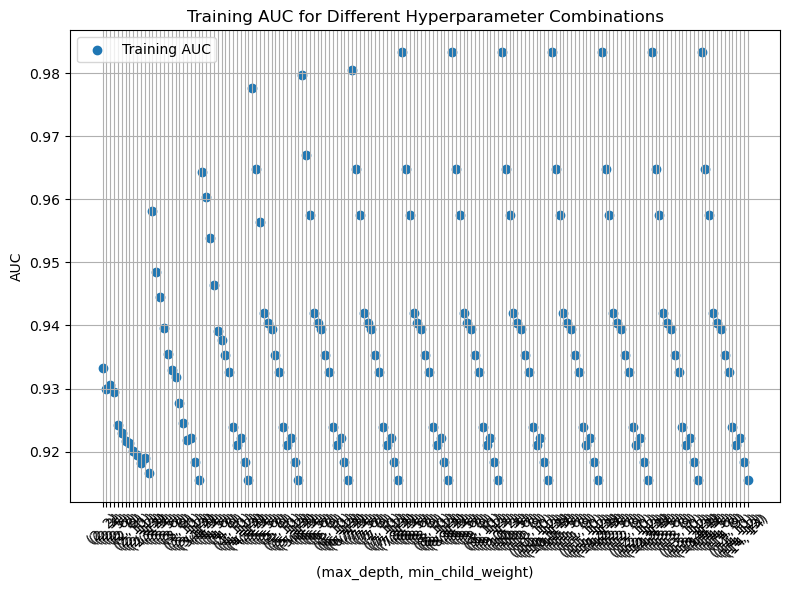

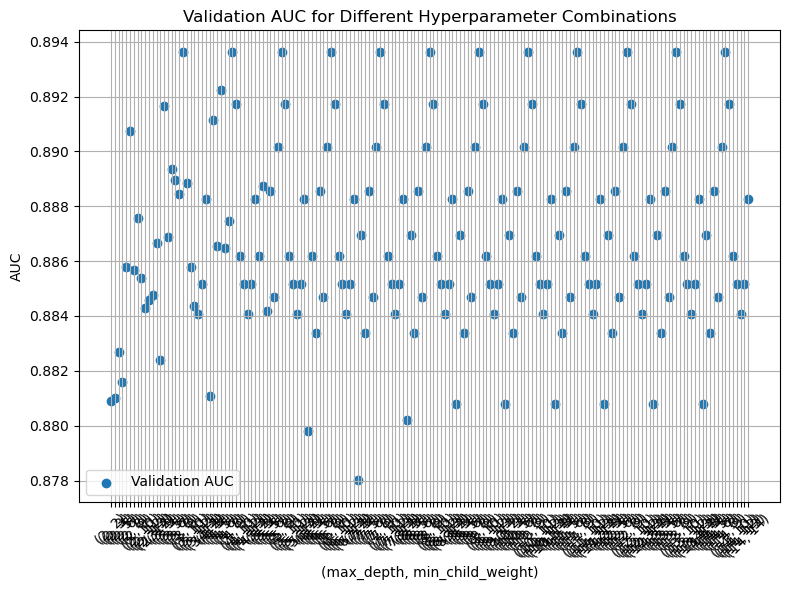

In [12]:
# Plotting Training AUC
plt.figure(figsize=(8, 6))
plt.scatter(range(len(train_auc_dict)), list(train_auc_dict.values()), label='Training AUC')
plt.xticks(range(len(train_auc_dict)), list(train_auc_dict.keys()), rotation=45)
plt.xlabel('(max_depth, min_child_weight)')
plt.ylabel('AUC')
plt.title('Training AUC for Different Hyperparameter Combinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Validation AUC
plt.figure(figsize=(8, 6))
plt.scatter(range(len(val_auc_dict)), list(val_auc_dict.values()), label='Validation AUC')
plt.xticks(range(len(val_auc_dict)), list(val_auc_dict.keys()), rotation=45)
plt.xlabel('(max_depth, min_child_weight)')
plt.ylabel('AUC')
plt.title('Validation AUC for Different Hyperparameter Combinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


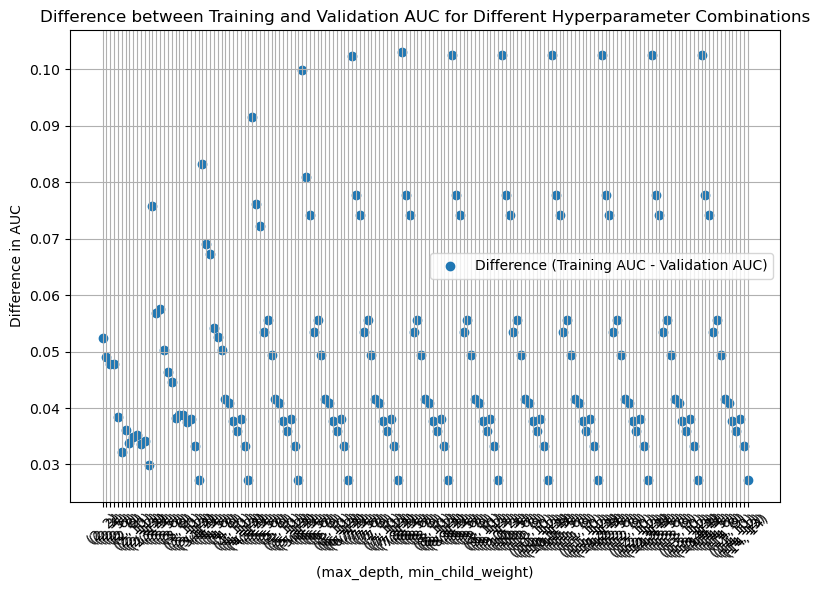

In [13]:
# Plotting the difference between Training AUC and Validation AUC
plt.figure(figsize=(8, 6))
train_auc_values = list(train_auc_dict.values())
val_auc_values = list(val_auc_dict.values())
auc_diff = [train_auc - val_auc for train_auc, val_auc in zip(train_auc_values, val_auc_values)]
plt.scatter(range(len(train_auc_dict)), auc_diff, label='Difference (Training AUC - Validation AUC)')
plt.xticks(range(len(train_auc_dict)), list(train_auc_dict.keys()), rotation=45)
plt.xlabel('(max_depth, min_child_weight)')
plt.ylabel('Difference in AUC')
plt.title('Difference between Training and Validation AUC for Different Hyperparameter Combinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

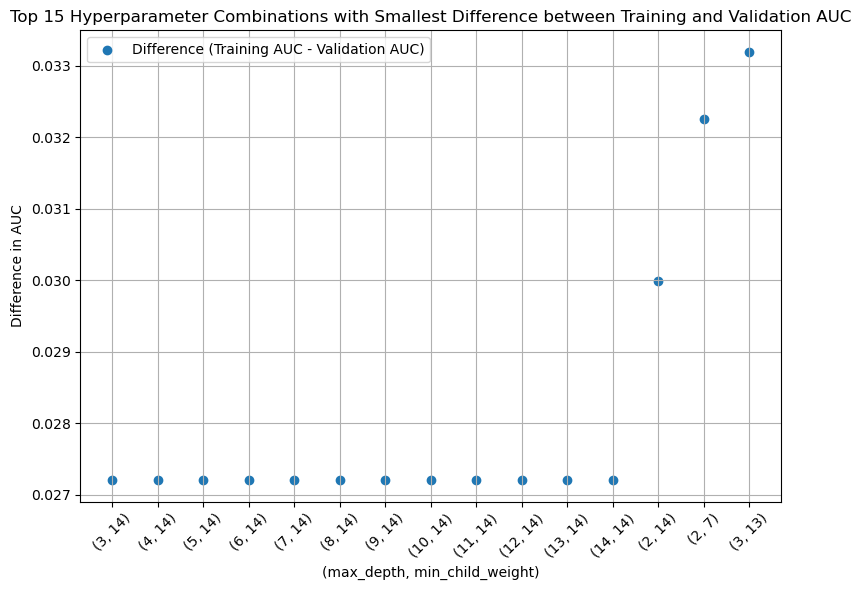

Top 15 Hyperparameter Combinations with Smallest Difference between Training and Validation AUC:
1. Hyperparameters: (3, 14), Difference in AUC: 0.02720102581234707
2. Hyperparameters: (4, 14), Difference in AUC: 0.02720102581234707
3. Hyperparameters: (5, 14), Difference in AUC: 0.02720102581234707
4. Hyperparameters: (6, 14), Difference in AUC: 0.02720102581234707
5. Hyperparameters: (7, 14), Difference in AUC: 0.02720102581234707
6. Hyperparameters: (8, 14), Difference in AUC: 0.02720102581234707
7. Hyperparameters: (9, 14), Difference in AUC: 0.02720102581234707
8. Hyperparameters: (10, 14), Difference in AUC: 0.02720102581234707
9. Hyperparameters: (11, 14), Difference in AUC: 0.02720102581234707
10. Hyperparameters: (12, 14), Difference in AUC: 0.02720102581234707
11. Hyperparameters: (13, 14), Difference in AUC: 0.02720102581234707
12. Hyperparameters: (14, 14), Difference in AUC: 0.02720102581234707
13. Hyperparameters: (2, 14), Difference in AUC: 0.029981713115353692
14. Hyper

In [14]:
# Get the indices of the top 15 smallest differences
top_15_indices = sorted(range(len(auc_diff)), key=lambda i: auc_diff[i])[:15]

# Plotting the top 15 combinations with the smallest difference
plt.figure(figsize=(8, 6))
top_15_combinations = {list(train_auc_dict.keys())[i]: auc_diff[i] for i in top_15_indices}
plt.scatter(range(len(top_15_combinations)), list(top_15_combinations.values()), label='Difference (Training AUC - Validation AUC)')
plt.xticks(range(len(top_15_combinations)), list(top_15_combinations.keys()), rotation=45)
plt.xlabel('(max_depth, min_child_weight)')
plt.ylabel('Difference in AUC')
plt.title('Top 15 Hyperparameter Combinations with Smallest Difference between Training and Validation AUC')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Print the top 15 hyperparameter combinations with their differences in AUC
print("Top 15 Hyperparameter Combinations with Smallest Difference between Training and Validation AUC:")
for i, (combination, difference) in enumerate(top_15_combinations.items(), 1):
    print(f"{i}. Hyperparameters: {combination}, Difference in AUC: {difference}")


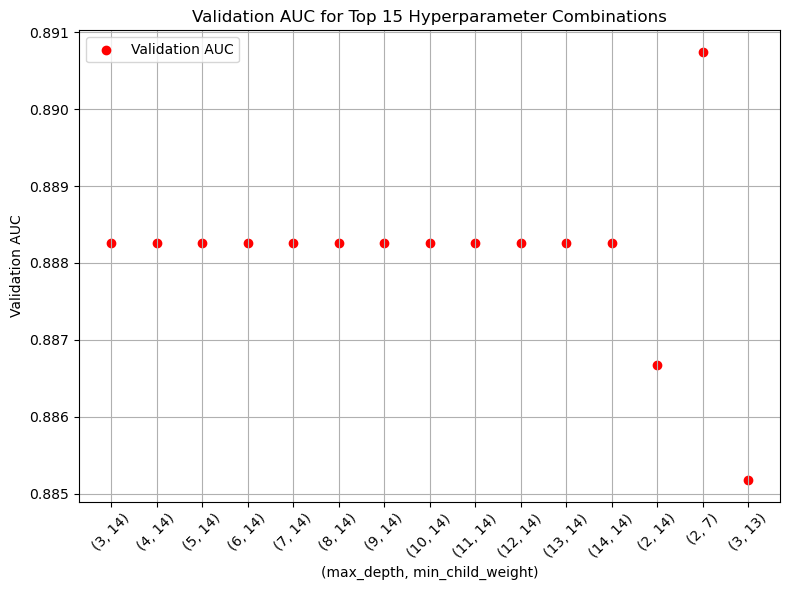

Validation AUC for Top 15 Hyperparameter Combinations:
1. Hyperparameters: (3, 14), Validation AUC: 0.8882587064676617
2. Hyperparameters: (4, 14), Validation AUC: 0.8882587064676617
3. Hyperparameters: (5, 14), Validation AUC: 0.8882587064676617
4. Hyperparameters: (6, 14), Validation AUC: 0.8882587064676617
5. Hyperparameters: (7, 14), Validation AUC: 0.8882587064676617
6. Hyperparameters: (8, 14), Validation AUC: 0.8882587064676617
7. Hyperparameters: (9, 14), Validation AUC: 0.8882587064676617
8. Hyperparameters: (10, 14), Validation AUC: 0.8882587064676617
9. Hyperparameters: (11, 14), Validation AUC: 0.8882587064676617
10. Hyperparameters: (12, 14), Validation AUC: 0.8882587064676617
11. Hyperparameters: (13, 14), Validation AUC: 0.8882587064676617
12. Hyperparameters: (14, 14), Validation AUC: 0.8882587064676617
13. Hyperparameters: (2, 14), Validation AUC: 0.8866666666666666
14. Hyperparameters: (2, 7), Validation AUC: 0.8907462686567165
15. Hyperparameters: (3, 13), Validation

In [15]:
# Get the corresponding Validation AUC values for the top 15 combinations
top_15_val_auc = {list(train_auc_dict.keys())[i]: list(val_auc_dict.values())[i] for i in top_15_indices}

# Plotting Validation AUC for the top 15 combinations
plt.figure(figsize=(8, 6))
plt.scatter(range(len(top_15_val_auc)), list(top_15_val_auc.values()), color='red', label='Validation AUC')
plt.xticks(range(len(top_15_val_auc)), list(top_15_val_auc.keys()), rotation=45)
plt.xlabel('(max_depth, min_child_weight)')
plt.ylabel('Validation AUC')
plt.title('Validation AUC for Top 15 Hyperparameter Combinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Print the validation AUC values for the top 15 hyperparameter combinations
print("Validation AUC for Top 15 Hyperparameter Combinations:")
for i, (combination, val_auc) in enumerate(top_15_val_auc.items(), 1):
    print(f"{i}. Hyperparameters: {combination}, Validation AUC: {val_auc}")


In [16]:
# Initialize the XGBoost classifier with the specified hyperparameters
best_model_XGB = xgb.XGBClassifier(n_estimators=40, learning_rate=0.1, max_depth=3, min_child_weight=13)


best_model_XGB.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

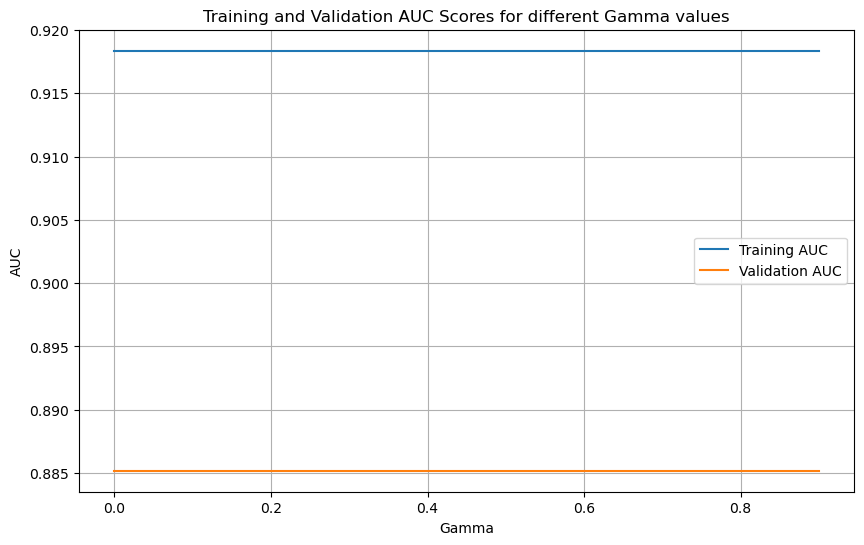

Difference between Training and Validation AUC scores for each Gamma value:
Gamma=0.0: 0.03319321758554172
Gamma=0.1: 0.03319321758554172
Gamma=0.2: 0.03319321758554172
Gamma=0.3: 0.03319321758554172
Gamma=0.4: 0.03319321758554172
Gamma=0.5: 0.03319321758554172
Gamma=0.6: 0.03319321758554172
Gamma=0.7: 0.03319321758554172
Gamma=0.8: 0.03319321758554172
Gamma=0.9: 0.03319321758554172


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Define the parameter grid including gamma, max_depth, and min_child_weight
param_test = {
    'gamma': [i/10.0 for i in range(0, 10)],
    'max_depth': [3],  # Fixed max_depth value
    'min_child_weight': [13]  # Fixed min_child_weight value
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=40,
    learning_rate=0.1
)

# Initialize lists to store results
train_auc_scores = []
valid_auc_scores = []

# Iterate through each value of gamma
for gamma in param_test['gamma']:
    # Update gamma value in parameters
    xgb_model.set_params(gamma=gamma)
    
    # Fit the model
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_test, cv=10)
    grid_search.fit(train_X, train_y)  # Assuming you have X_train and y_train
    
    # Record training and validation AUC scores
    train_auc_scores.append(roc_auc_score(train_y, grid_search.predict_proba(train_X)[:, 1]))
    valid_auc_scores.append(roc_auc_score(test_y, grid_search.predict_proba(test_X)[:, 1]))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(param_test['gamma'], train_auc_scores, label='Training AUC')
plt.plot(param_test['gamma'], valid_auc_scores, label='Validation AUC')
plt.xlabel('Gamma')
plt.ylabel('AUC')
plt.title('Training and Validation AUC Scores for different Gamma values')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the difference between training and validation AUC scores
auc_difference = np.abs(np.array(train_auc_scores) - np.array(valid_auc_scores))
print("Difference between Training and Validation AUC scores for each Gamma value:")
for gamma, diff in zip(param_test['gamma'], auc_difference):
    print(f"Gamma={gamma}: {diff}")



In [18]:
#Here I will not add gamma.
best_model_XGB = xgb.XGBClassifier(n_estimators=40, learning_rate=0.1, max_depth=3, min_child_weight=13)


best_model_XGB.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9]
}

# Define the model
best_model_XGB = xgb.XGBClassifier(n_estimators=40, learning_rate=0.1, max_depth=3, min_child_weight=13)

# Use GridSearchCV for parameter search
grid_search = GridSearchCV(estimator=best_model_XGB, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(train_X, train_y)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'colsample_bytree': 0.6, 'subsample': 0.8}


In [20]:
from sklearn.metrics import roc_auc_score

# Store training set AUC and validation set AUC for each parameter combination
train_auc = []
val_auc = []

# Iterate over each parameter combination
for params in grid_search.cv_results_['params']:
    # Set parameters
    best_model_XGB.set_params(**params)
    
    # Fit the model
    best_model_XGB.fit(train_X, train_y)
    
    # Calculate training set AUC
    train_pred = best_model_XGB.predict_proba(train_X)[:, 1]
    train_auc.append(roc_auc_score(train_y, train_pred))
    
    # Calculate validation set AUC
    val_pred = best_model_XGB.predict_proba(test_X)[:, 1]
    val_auc.append(roc_auc_score(test_y, val_pred))

# Print training set AUC, validation set AUC, and their difference
for i in range(len(train_auc)):
    print("Params:", grid_search.cv_results_['params'][i])
    print("Training AUC:", train_auc[i])
    print("Validation AUC:", val_auc[i])
    print("Difference (Training - Validation) AUC:", train_auc[i] - val_auc[i])
    print("-----------------------")


Params: {'colsample_bytree': 0.6, 'subsample': 0.6}
Training AUC: 0.9109977324263038
Validation AUC: 0.8860696517412935
Difference (Training - Validation) AUC: 0.02492808068501029
-----------------------
Params: {'colsample_bytree': 0.6, 'subsample': 0.7}
Training AUC: 0.913265306122449
Validation AUC: 0.8866666666666666
Difference (Training - Validation) AUC: 0.026598639455782447
-----------------------
Params: {'colsample_bytree': 0.6, 'subsample': 0.8}
Training AUC: 0.9170506912442397
Validation AUC: 0.8839800995024876
Difference (Training - Validation) AUC: 0.03307059174175209
-----------------------
Params: {'colsample_bytree': 0.6, 'subsample': 0.9}
Training AUC: 0.9177455928608003
Validation AUC: 0.8893532338308459
Difference (Training - Validation) AUC: 0.028392359029954406
-----------------------
Params: {'colsample_bytree': 0.7, 'subsample': 0.6}
Training AUC: 0.9085107161144027
Validation AUC: 0.8874626865671641
Difference (Training - Validation) AUC: 0.02104802954723861
---

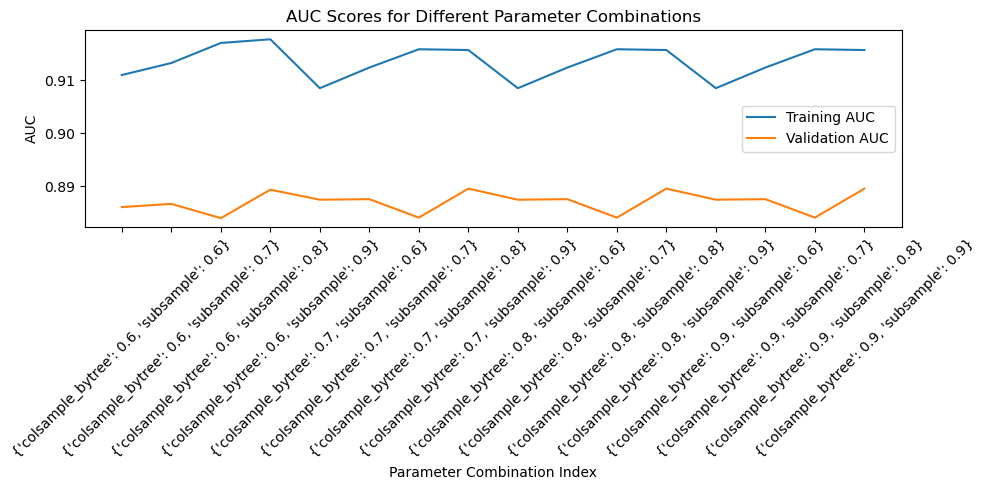

In [21]:
import matplotlib.pyplot as plt

# Visualize training set AUC, validation set AUC, and their difference
params_range = range(len(train_auc))
plt.figure(figsize=(10, 5))
plt.plot(params_range, train_auc, label='Training AUC')
plt.plot(params_range, val_auc, label='Validation AUC')
plt.xlabel('Parameter Combination Index')
plt.ylabel('AUC')
plt.title('AUC Scores for Different Parameter Combinations')
plt.legend()
plt.xticks(params_range, [str(params) for params in grid_search.cv_results_['params']], rotation=45)
plt.tight_layout()
plt.show()


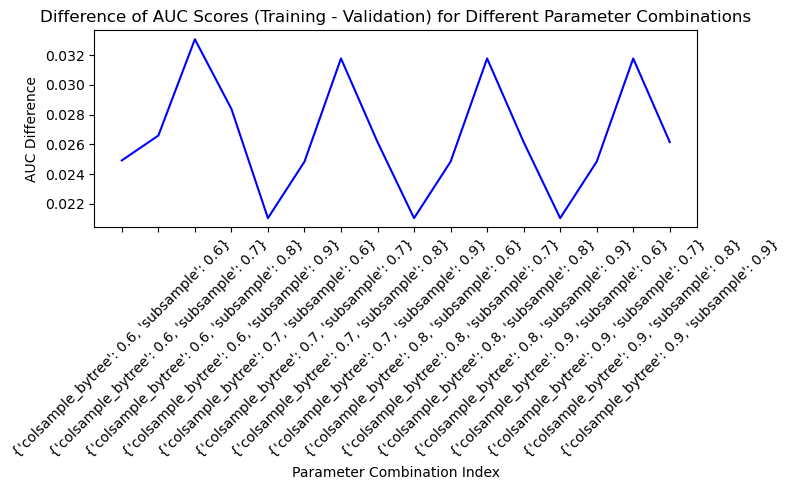

In [22]:
import matplotlib.pyplot as plt

# Calculate training set AUC, validation set AUC, and their difference
diff_auc = [train_auc[i] - val_auc[i] for i in range(len(train_auc))]

# Visualize the difference
params_range = range(len(train_auc))
plt.figure(figsize=(8, 5))
plt.plot(params_range, diff_auc, label='Difference (Training - Validation) AUC', color='blue')
plt.xlabel('Parameter Combination Index')
plt.ylabel('AUC Difference')
plt.title('Difference of AUC Scores (Training - Validation) for Different Parameter Combinations')
plt.xticks(params_range, [str(params) for params in grid_search.cv_results_['params']], rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# For record.
import xgboost as xgb

best_model_XGB = xgb.XGBClassifier(n_estimators=40, 
                                   learning_rate=0.1, 
                                   max_depth=3, 
                                   min_child_weight=13,
                                   colsample_bytree=0.6, 
                                   subsample=0.7)

best_model_XGB.fit(train_X, train_y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

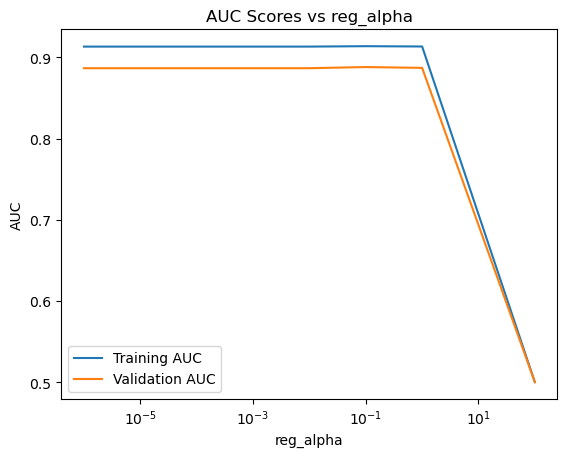

In [24]:
import matplotlib.pyplot as plt

# Values for 'reg_alpha'
reg_alpha_values = [1e-6,1e-5,1e-4,1e-3,1e-2, 0.1, 1, 100,]

# Initialize lists to store training and validation AUC scores
train_auc_scores = []
val_auc_scores = []

# Loop through each reg_alpha value
for reg_alpha in reg_alpha_values:
    # Initialize XGBClassifier with reg_alpha value
    model = xgb.XGBClassifier(n_estimators=40, 
                              learning_rate=0.1, 
                              max_depth=3, 
                              min_child_weight=13,
                              colsample_bytree=0.6, 
                              subsample=0.7,
                              reg_alpha=reg_alpha)
    
    # Fit the model
    model.fit(train_X, train_y)
    
    # Predict probabilities for training set
    train_probs = model.predict_proba(train_X)[:, 1]
    
    # Calculate training AUC
    train_auc = roc_auc_score(train_y, train_probs)
    train_auc_scores.append(train_auc)
    
    # Predict probabilities for validation set
    val_probs = model.predict_proba(test_X)[:, 1]
    
    # Calculate validation AUC
    val_auc = roc_auc_score(test_y, val_probs)
    val_auc_scores.append(val_auc)

# Plot the AUC scores
plt.plot(reg_alpha_values, train_auc_scores, label='Training AUC')
plt.plot(reg_alpha_values, val_auc_scores, label='Validation AUC')
plt.xlabel('reg_alpha')
plt.ylabel('AUC')
plt.title('AUC Scores vs reg_alpha')
plt.xscale('log')
plt.legend()
plt.show()


In [25]:
import numpy as np

# Calculate the absolute differences between training and validation AUC scores
auc_diff = np.abs(np.array(train_auc_scores) - np.array(val_auc_scores))

# Find the indices of the smallest 8 differences
min_diff_indices = np.argsort(auc_diff)[:7]

# Find the corresponding reg_alpha values
optimal_reg_alphas = [reg_alpha_values[i] for i in min_diff_indices]

print("8 optimal reg_alpha values with minimum differences between training and validation AUC:")
for i, alpha in enumerate(optimal_reg_alphas):
    print(f"Rank {i+1}: {alpha}")



8 optimal reg_alpha values with minimum differences between training and validation AUC:
Rank 1: 100
Rank 2: 0.1
Rank 3: 1
Rank 4: 1e-06
Rank 5: 1e-05
Rank 6: 0.0001
Rank 7: 0.001


In [26]:
# For record.
best_model_XGB = xgb.XGBClassifier(n_estimators=40, learning_rate=0.1, max_depth=3, min_child_weight=13,colsample_bytree=0.6, 
                                   subsample=0.7,reg_alpha=1e-05)


best_model_XGB.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              n_estimators=40, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [28]:
# Modify the learning rate and n_estimators here.
best_model_XGB = xgb.XGBClassifier(n_estimators=200, learning_rate=0.02, max_depth=3, min_child_weight=13,colsample_bytree=0.6, 
                                   subsample=0.7,reg_alpha=1e-05)


best_model_XGB.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

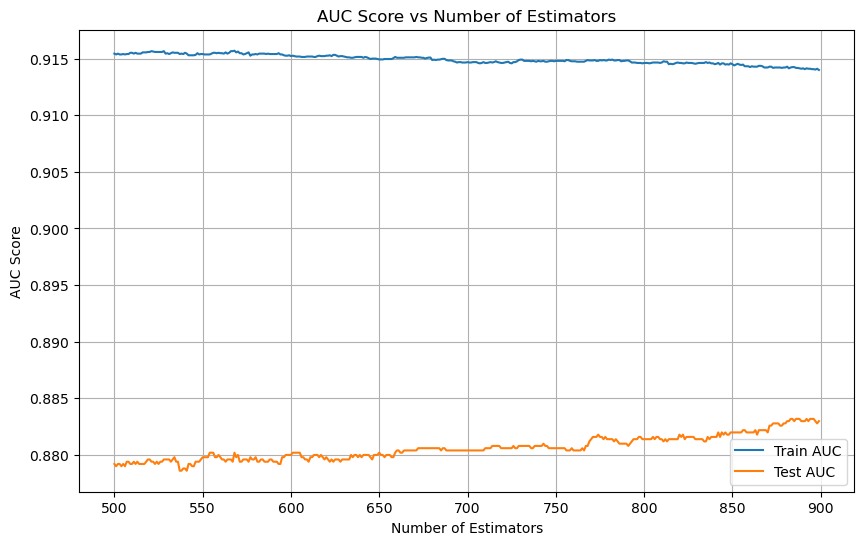

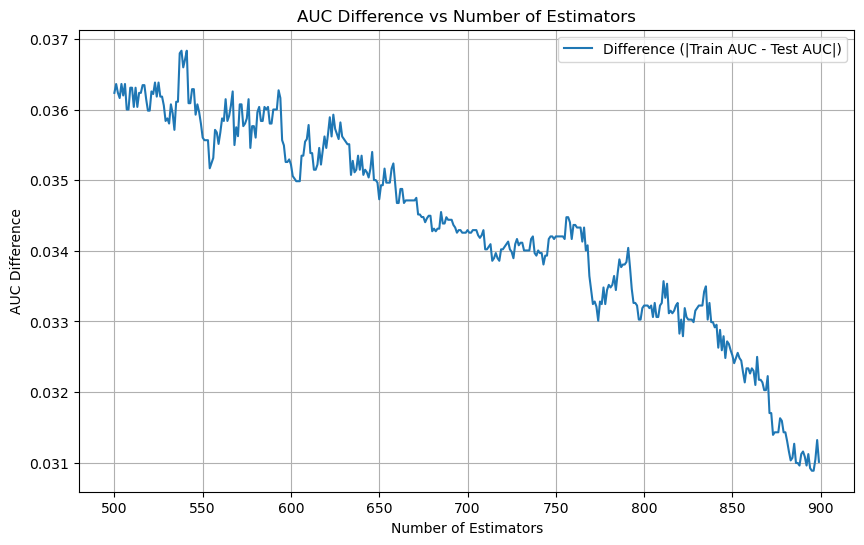

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# Initialize lists to store results
auc_train_scores = []
auc_test_scores = []
auc_diff_scores = [] 
n_estimators_range = range(500, 900)

for i in n_estimators_range:
    # Train XGBoost model
    model = xgb.XGBClassifier(n_estimators=i, learning_rate=0.005, max_depth=3, min_child_weight=13,colsample_bytree=0.6, 
                                   subsample=0.7,reg_alpha=1e-05
    )
    model.fit(train_X, train_y)

    # Calculate AUC for train set
    train_pred_prob = model.predict_proba(train_X)[:, 1]
    auc_train = roc_auc_score(train_y, train_pred_prob)
    auc_train_scores.append(auc_train)

    # Calculate AUC for test set
    test_pred_prob = model.predict_proba(test_X)[:, 1]
    auc_test = roc_auc_score(test_y, test_pred_prob)
    auc_test_scores.append(auc_test)

    auc_diff = np.abs(auc_train - auc_test)
    auc_diff_scores.append(auc_diff)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, auc_train_scores, label='Train AUC')
plt.plot(n_estimators_range, auc_test_scores, label='Test AUC')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()


# Plot the AUC difference
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, auc_diff_scores, label='Difference (|Train AUC - Test AUC|)')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Difference')
plt.title('AUC Difference vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

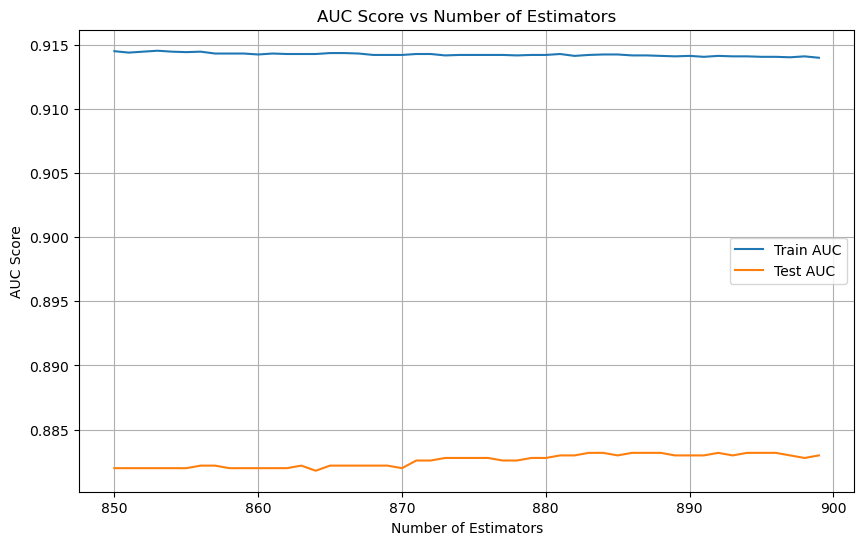

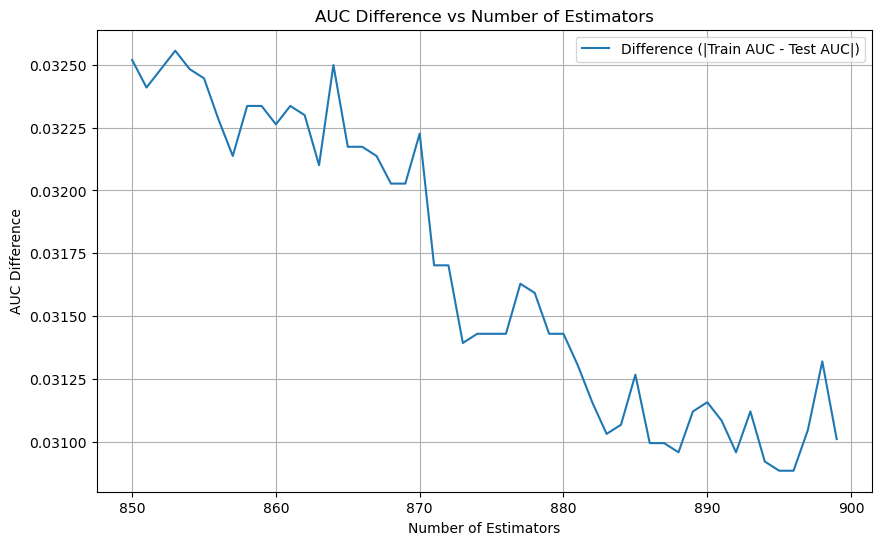

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# Initialize lists to store results
auc_train_scores = []
auc_test_scores = []
auc_diff_scores = [] 
n_estimators_range = range(850,900)

for i in n_estimators_range:
    # Train XGBoost model
    model = xgb.XGBClassifier(n_estimators=i, learning_rate=0.005, max_depth=3, min_child_weight=13,colsample_bytree=0.6, 
                                   subsample=0.7,reg_alpha=1e-05
    )
    model.fit(train_X, train_y)

    # Calculate AUC for train set
    train_pred_prob = model.predict_proba(train_X)[:, 1]
    auc_train = roc_auc_score(train_y, train_pred_prob)
    auc_train_scores.append(auc_train)

    # Calculate AUC for test set
    test_pred_prob = model.predict_proba(test_X)[:, 1]
    auc_test = roc_auc_score(test_y, test_pred_prob)
    auc_test_scores.append(auc_test)

    auc_diff = np.abs(auc_train - auc_test)
    auc_diff_scores.append(auc_diff)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, auc_train_scores, label='Train AUC')
plt.plot(n_estimators_range, auc_test_scores, label='Test AUC')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()


# Plot the AUC difference
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, auc_diff_scores, label='Difference (|Train AUC - Test AUC|)')
plt.xlabel('Number of Estimators')
plt.ylabel('AUC Difference')
plt.title('AUC Difference vs Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# Initialize lists to store results
auc_train_scores = []
auc_test_scores = []
auc_diff_scores = [] 
n_estimators_range = range(880,900)

for i in n_estimators_range:
    # Train XGBoost model
    model = xgb.XGBClassifier(n_estimators=i, learning_rate=0.005, max_depth=3, min_child_weight=13,colsample_bytree=0.6, 
                                   subsample=0.7,reg_alpha=1e-05
    )
    model.fit(train_X, train_y)

    # Calculate AUC for train set
    train_pred_prob = model.predict_proba(train_X)[:, 1]
    auc_train = roc_auc_score(train_y, train_pred_prob)
    auc_train_scores.append(auc_train)

    # Calculate AUC for test set
    test_pred_prob = model.predict_proba(test_X)[:, 1]
    auc_test = roc_auc_score(test_y, test_pred_prob)
    auc_test_scores.append(auc_test)

    auc_diff = np.abs(auc_train - auc_test)
    auc_diff_scores.append(auc_diff)


In [32]:
for i in range(len(n_estimators_range)):
    print("n_estimators: {}, Train AUC: {:.4f}, Test AUC: {:.4f}, AUC Difference: {:.4f}".format(
        n_estimators_range[i], auc_train_scores[i], auc_test_scores[i], auc_diff_scores[i]))


n_estimators: 880, Train AUC: 0.9142, Test AUC: 0.8828, AUC Difference: 0.0314
n_estimators: 881, Train AUC: 0.9143, Test AUC: 0.8830, AUC Difference: 0.0313
n_estimators: 882, Train AUC: 0.9141, Test AUC: 0.8830, AUC Difference: 0.0312
n_estimators: 883, Train AUC: 0.9142, Test AUC: 0.8832, AUC Difference: 0.0310
n_estimators: 884, Train AUC: 0.9143, Test AUC: 0.8832, AUC Difference: 0.0311
n_estimators: 885, Train AUC: 0.9143, Test AUC: 0.8830, AUC Difference: 0.0313
n_estimators: 886, Train AUC: 0.9142, Test AUC: 0.8832, AUC Difference: 0.0310
n_estimators: 887, Train AUC: 0.9142, Test AUC: 0.8832, AUC Difference: 0.0310
n_estimators: 888, Train AUC: 0.9141, Test AUC: 0.8832, AUC Difference: 0.0310
n_estimators: 889, Train AUC: 0.9141, Test AUC: 0.8830, AUC Difference: 0.0311
n_estimators: 890, Train AUC: 0.9141, Test AUC: 0.8830, AUC Difference: 0.0312
n_estimators: 891, Train AUC: 0.9141, Test AUC: 0.8830, AUC Difference: 0.0311
n_estimators: 892, Train AUC: 0.9141, Test AUC: 0.88

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb

best_model_XGB = xgb.XGBClassifier(n_estimators=895, learning_rate=0.005, max_depth=3, min_child_weight=13,colsample_bytree=0.6, 
                                   subsample=0.7,reg_alpha=1e-05,random_state=321)


best_model_XGB.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              n_estimators=895, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=321, ...)

In [50]:
XGB_train_y_pred = best_model_XGB.predict(train_X)
XGBboost_train_y_score = best_model_XGB.predict_proba(train_X)[:, 1]
fprXGB,tprXGB,threshold = roc_curve(train_y,XGBboost_train_y_score)
auc(fprXGB,tprXGB)

0.9142893716626435

In [51]:
XGB_y_pred = best_model_XGB.predict(test_X)
XGBboost_y_score = best_model_XGB.predict_proba(test_X)[:, 1]
fprxgb,tprxgb,threshold = roc_curve(test_y,XGBboost_y_score)
auc(fprxgb,tprxgb)

0.8817910447761194

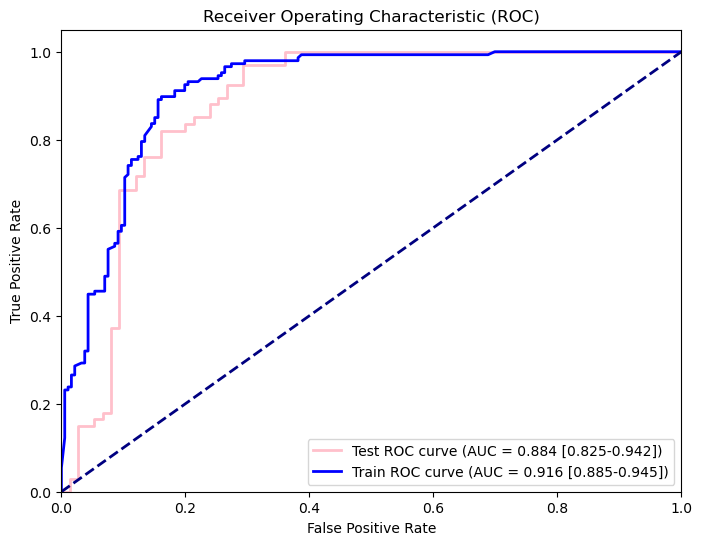

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample
from xgboost import XGBClassifier
import numpy as np
np.random.seed(321)


def calculate_auc_with_ci_bootstrap(y_true, y_score, n_bootstrap=1000):
    aucs = []
    n_samples = len(y_true)
    for _ in range(n_bootstrap):
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        bootstrapped_y_true = y_true[indices]
        bootstrapped_y_score = y_score[indices]
        fpr, tpr, _ = roc_curve(bootstrapped_y_true, bootstrapped_y_score)
        aucs.append(auc(fpr, tpr))
    aucs.sort()
    lower_idx = int(0.025 * n_bootstrap)
    upper_idx = int(0.975 * n_bootstrap)
    mean_auc = np.mean(aucs)
    ci_lower = aucs[lower_idx]
    ci_upper = aucs[upper_idx]
    return mean_auc, ci_lower, ci_upper

# Assuming you already have best_model_XGB, train_X, test_X, train_y, test_y

# Calculate AUC for test set
XGBboost_y_score = best_model_XGB.predict_proba(test_X)[:, 1]
fprxgb,tprxgb, _ = roc_curve(test_y, XGBboost_y_score)
test_auc, test_ci_lower, test_ci_upper = calculate_auc_with_ci_bootstrap(test_y, XGBboost_y_score)

# Calculate AUC for train set
XGBboost_train_y_score = best_model_XGB.predict_proba(train_X)[:, 1]
fprXGB, tprXGB, _ = roc_curve(train_y, XGBboost_train_y_score)
train_auc, train_ci_lower, train_ci_upper = calculate_auc_with_ci_bootstrap(train_y, XGBboost_train_y_score)

plt.figure(figsize=(8, 6))
plt.plot(fprxgb,tprxgb, color='pink', lw=2, label='Test ROC curve (AUC = {:.3f} [{:.3f}-{:.3f}])'.format(test_auc, test_ci_lower, test_ci_upper))
plt.plot(fprXGB, tprXGB, color='blue', lw=2, label='Train ROC curve (AUC = {:.3f} [{:.3f}-{:.3f}])'.format(train_auc, train_ci_lower, train_ci_upper))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score, roc_curve
train_y_prob =best_model_XGB.predict_proba(train_X)[:, 1]

# AUC
train_auc = roc_auc_score(train_y, train_y_prob)

In [54]:
def calculate_metrics(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    predictive_accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return sensitivity, specificity, ppv, npv, predictive_accuracy, mcc

In [55]:
# Metrics
sensitivity_train, specificity_train, ppv_train, npv_train, predictive_accuracy_train, mcc_train = calculate_metrics(train_y,XGB_train_y_pred)
sensitivity_test, specificity_test, ppv_test, npv_test, predictive_accuracy_test, mcc_test = calculate_metrics(test_y,XGB_y_pred)


print("Train Set Metrics:")
print(f"Sensitivity: {sensitivity_train:.4f}")
print(f"Specificity: {specificity_train:.4f}")
print(f"PPV (Precision): {ppv_train:.4f}")
print(f"NPV: {npv_train:.4f}")
print(f"Predictive Accuracy: {predictive_accuracy_train:.4f}")
print(f"MCC: {mcc_train:.4f}")

print("\nTest Set Metrics:")
print(f"Sensitivity: {sensitivity_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")
print(f"PPV (Precision): {ppv_test:.3f}")
print(f"NPV: {npv_test:.4f}")
print(f"Predictive Accuracy: {predictive_accuracy_test:.4f}")
print(f"MCC: {mcc_test:.4f}")

Train Set Metrics:
Sensitivity: 0.8095
Specificity: 0.8656
PPV (Precision): 0.8264
NPV: 0.8519
Predictive Accuracy: 0.8408
MCC: 0.6767

Test Set Metrics:
Sensitivity: 0.7015
Specificity: 0.8800
PPV (Precision): 0.839
NPV: 0.7674
Predictive Accuracy: 0.7958
MCC: 0.5940


Training AUC： 0.9142893716626435


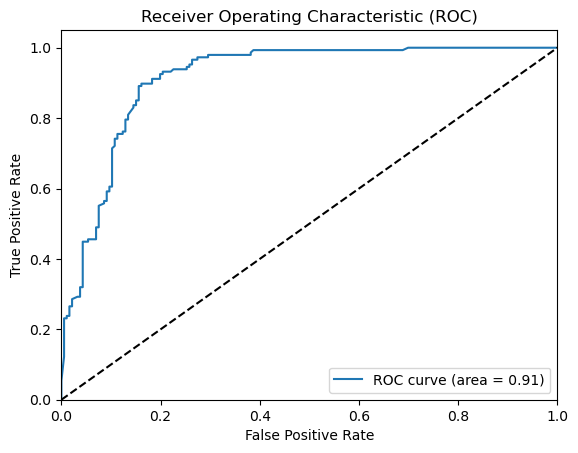

In [56]:
train_auc = roc_auc_score(train_y, train_y_prob)
print("Training AUC：", train_auc)

fprXGB,tprXGB, thresholds = roc_curve(train_y, train_y_prob)
plt.plot(fprXGB,tprXGB, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [57]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, XGB_y_pred , num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort(XGB_y_pred)  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y,XGB_y_pred)  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Determine model calibration based on p-value
if p_value < 0.05:
    print("Model calibration is poor")
else:
    print("Model calibration is good")


Chi-squared: 12.696645523286117
P-value: 0.176819951007035
Degrees of freedom: 8
Model calibration is good


In [58]:
clf_1_list = [
    (best_model_XGB, "best_XGB")
]

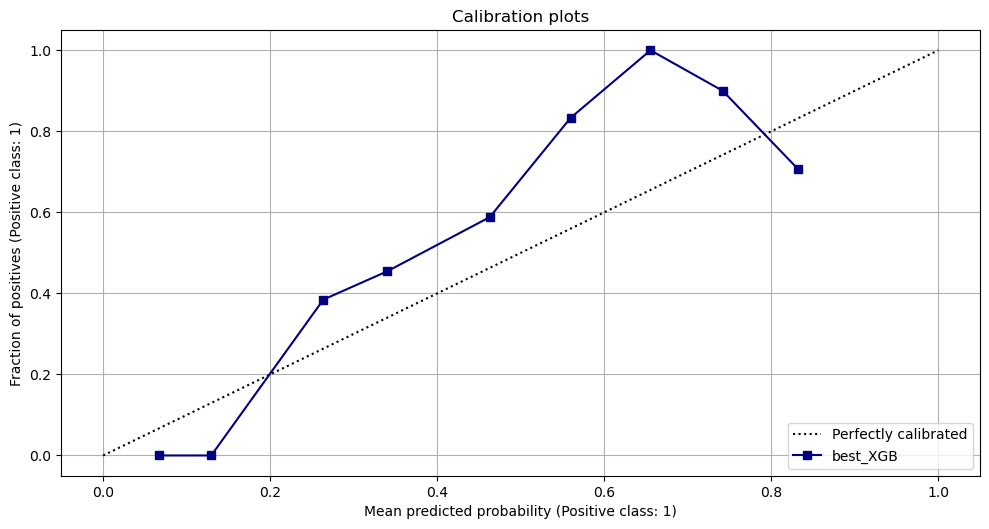

In [59]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
import numpy as np
import random

np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine classifier lists
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Define color list
colors = ["navy", "darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    color = colors[i % len(colors)]  # Cycle through colors
    display = CalibrationDisplay.from_estimator(
        clf,  # Using the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=color
    )

plt.tight_layout()
#plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [60]:
y_pred =XGB_y_pred

Model: best_model_XGB, Trained model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=13, missing=nan, monotone_constraints=None,
              n_estimators=895, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=321, ...)


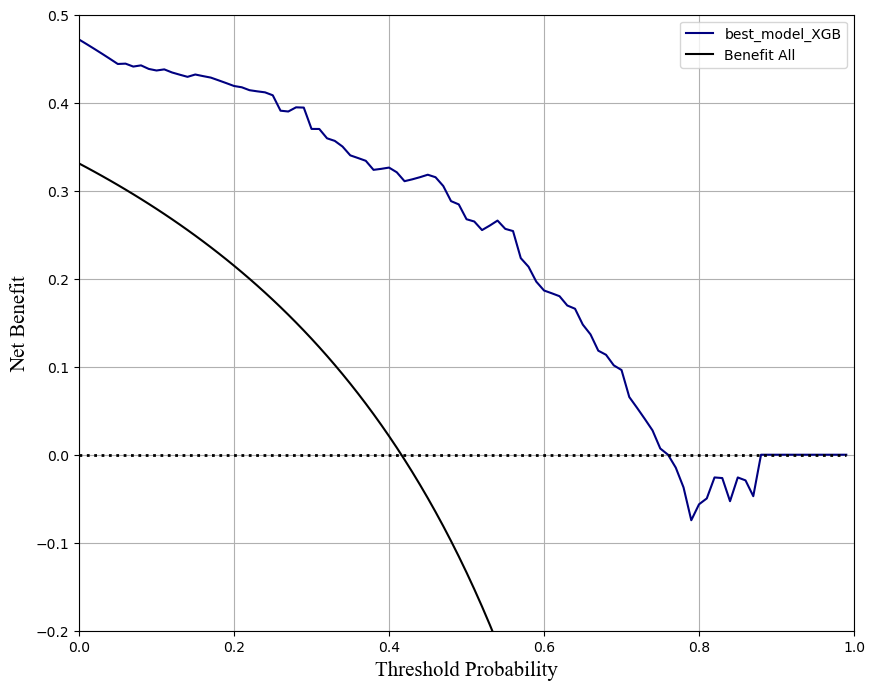

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
 
models = [
    ("best_model_XGB",best_model_XGB)
]

def net_benefit_model(test_y,y_prob,thresh_group):
    total = test_y.shape[0]
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        net_benefit = tp/total-fp/total*(thresh/(1-thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model
 
def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
    total = test_y.shape[0]
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp)/total - (tn)/total*(thresh/(1-thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["navy","darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})

plt.grid('major')

# Get the current axes, allowing access to the spines
#ax = plt.gca()

# Set spine colors
#ax.spines['right'].set_color((0.8, 0.8, 0.8))
#ax.spines['top'].set_color((0.8, 0.8, 0.8))

plt.legend(loc='upper right')

# To save the plot as a PDF
#plt.savefig('C:/Users/12292/Desktop/myplo1t.pdf', format='pdf')

plt.show()

In [62]:
#I think that the calibration curve and DCA curve were not quite satisfactory, 
#so I manually adjusted the hyperparameters.

In [63]:
# After multiple rounds of adjustments, 
# the final model will have an aesthetically pleasing calibration curve, 
# with other metrics falling within acceptable ranges. 
# There will certainly be other optimal hyperparameters, 
# but due to time constraints, achieving a satisfactory result is sufficient.

In [ ]:
#Here is my Final Model XGB

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb
best_model_XGB = xgb.XGBClassifier(n_estimators=254, learning_rate=0.0395, max_depth=3, min_child_weight=7,colsample_bytree=0.4, 
                                   subsample=0.4,random_state=527)



best_model_XGB.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0395, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=254, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=527, ...)

In [65]:
XGB_train_y_pred = best_model_XGB.predict(train_X)
XGBboost_train_y_score = best_model_XGB.predict_proba(train_X)[:, 1]
fprXGB,tprXGB,threshold = roc_curve(train_y,XGBboost_train_y_score)
auc(fprXGB,tprXGB)

0.9128081340062908

In [66]:
XGB_y_pred = best_model_XGB.predict(test_X)
XGBboost_y_score = best_model_XGB.predict_proba(test_X)[:, 1]
fprxgb,tprxgb,threshold = roc_curve(test_y,XGBboost_y_score)
auc(fprxgb,tprxgb)

0.8877611940298507

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve
train_y_prob =best_model_XGB.predict_proba(train_X)[:, 1]

train_auc = roc_auc_score(train_y, train_y_prob)

In [70]:
# Metrics
sensitivity_train, specificity_train, ppv_train, npv_train, predictive_accuracy_train, mcc_train = calculate_metrics(train_y,XGB_train_y_pred)
sensitivity_test, specificity_test, ppv_test, npv_test, predictive_accuracy_test, mcc_test = calculate_metrics(test_y,XGB_y_pred)

# print
print("Train Set Metrics:")
print(f"Sensitivity: {sensitivity_train:.4f}")
print(f"Specificity: {specificity_train:.4f}")
print(f"PPV (Precision): {ppv_train:.4f}")
print(f"NPV: {npv_train:.4f}")
print(f"Predictive Accuracy: {predictive_accuracy_train:.4f}")
print(f"MCC: {mcc_train:.4f}")

print("\nTest Set Metrics:")
print(f"Sensitivity: {sensitivity_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")
print(f"PPV (Precision): {ppv_test:.3f}")
print(f"NPV: {npv_test:.4f}")
print(f"Predictive Accuracy: {predictive_accuracy_test:.4f}")
print(f"MCC: {mcc_test:.4f}")

Train Set Metrics:
Sensitivity: 0.8367
Specificity: 0.8441
PPV (Precision): 0.8092
NPV: 0.8674
Predictive Accuracy: 0.8408
MCC: 0.6787

Test Set Metrics:
Sensitivity: 0.7612
Specificity: 0.8667
PPV (Precision): 0.836
NPV: 0.8025
Predictive Accuracy: 0.8169
MCC: 0.6332


Training AUC： 0.9128081340062908


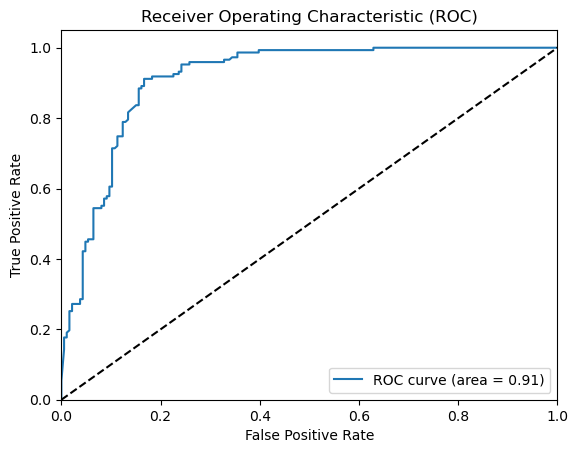

In [71]:
train_auc = roc_auc_score(train_y, train_y_prob)
print("Training AUC：", train_auc)

fprXGB,tprXGB, thresholds = roc_curve(train_y, train_y_prob)
plt.plot(fprXGB,tprXGB, label='ROC curve (area = %0.2f)' % train_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [72]:
import numpy as np  
from scipy.stats import chi2_contingency  

def hosmer_lemeshow_test(test_y, XGB_y_pred , num_groups=10):  
    # Sort the data based on predicted probabilities  
    sorted_indices = np.argsort(XGB_y_pred)  
    sorted_y = test_y[sorted_indices]  
    
    # Create groups based on the sorted indices  
    group_size = len(sorted_y) // num_groups  
    group_bounds = np.arange(0, len(sorted_y) + 1, group_size)  
    
    # Calculate observed and expected counts for each group  
    observed_counts = np.zeros(num_groups)  
    expected_counts = np.zeros(num_groups)  
    
    total_positive = np.sum(sorted_y)  
    total_negative = len(sorted_y) - total_positive  
    
    for i in range(num_groups):  
        start, end = group_bounds[i], group_bounds[i + 1]  
        observed_counts[i] = np.sum(sorted_y[start:end])  
        expected_counts[i] = (end - start) * total_positive / len(sorted_y)  
        
    # Perform chi-squared test  
    chi2, p = chi2_contingency(np.array([observed_counts, expected_counts]).T)[:2]  
    
    dof = num_groups - 2  # Degrees of freedom for chi-squared test
      
    return chi2, p, dof  

chi2, p_value, dof = hosmer_lemeshow_test(test_y,XGB_y_pred)  
print(f"Chi-squared: {chi2}")  
print(f"P-value: {p_value}")  
print(f"Degrees of freedom: {dof}")

# Determine the calibration of the model based on the P-value
if p_value < 0.05:
    print("The model calibration is poor")
else:
    print("The model calibration is good")


Chi-squared: 16.102124381629054
P-value: 0.06477934921791016
Degrees of freedom: 8
The model calibration is good


In [73]:
clf_1_list = [
    (best_model_XGB, "best_XGB"),
]

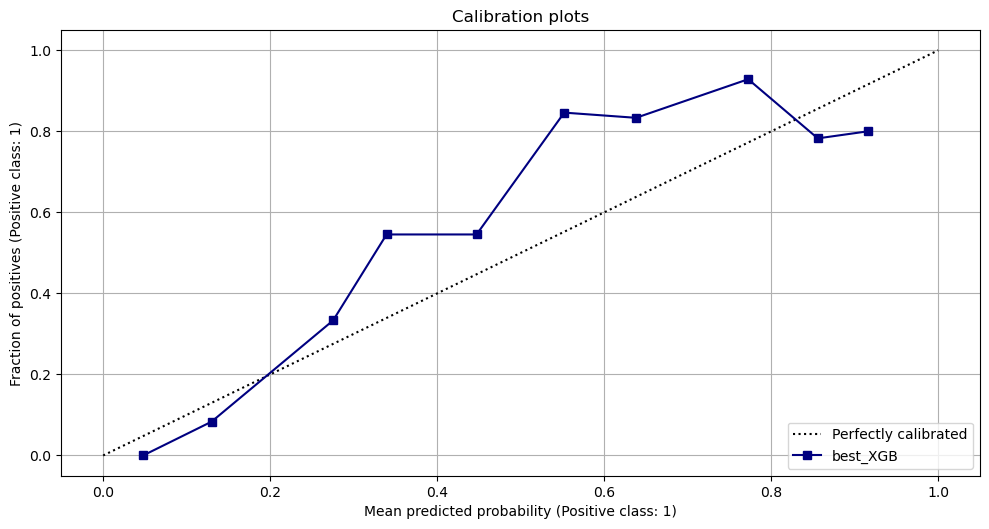

In [74]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay
import numpy as np
import random

np.random.seed(321)
random.seed(321)

# Create figure and subplots
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)

# Create subplot for calibration curves
ax_calibration_curve = fig.add_subplot(gs[:2, :2])
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Combine classifier lists
combined_clf_list = list(clf_1_list)  # Assuming clf_list and clf_1_list are lists of (classifier, name) tuples

# Define color list
colors = ["navy", "darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]

# Plot calibration curve for each classifier
for i, (clf, name) in enumerate(combined_clf_list):
    clf.fit(train_X, train_y)  # Train the model
    color = colors[i % len(colors)]  # Cycle through colors
    display = CalibrationDisplay.from_estimator(
        clf,  # Using the classifier model
        test_X,
        test_y,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=color
    )

plt.tight_layout()
#plt.savefig("CalibrationPlots1.pdf")  # Save as PDF
plt.show()  # Display the plot


In [75]:
y_pred =XGB_y_pred

Model: best_model_XGB, Trained model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0395, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=254, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=527, ...)


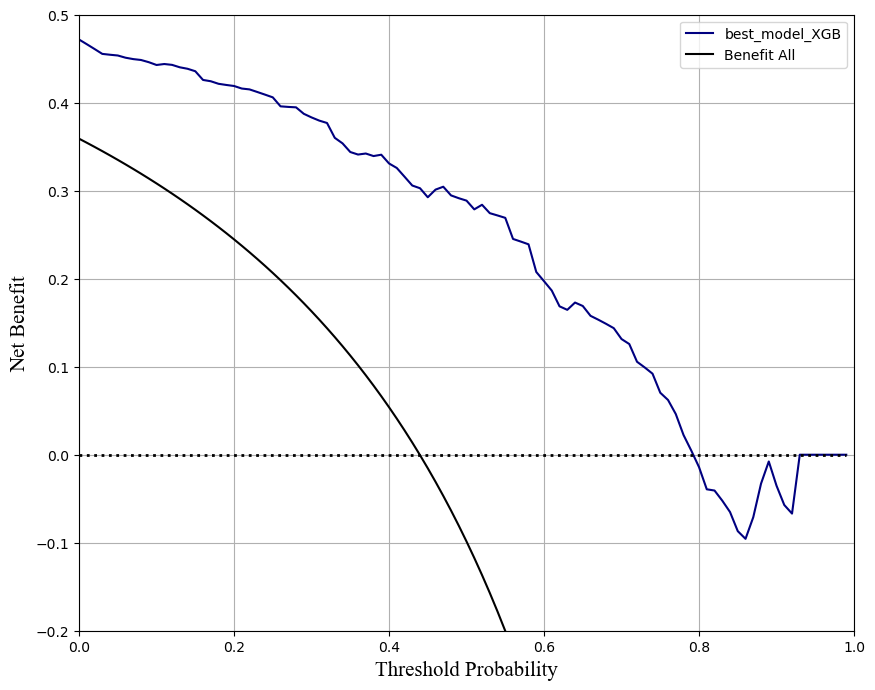

In [76]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
plt.figure(figsize=(10, 8))
np.random.seed(321)
random.seed(321)
 
models = [
    ("best_model_XGB",best_model_XGB)
]

def net_benefit_model(test_y,y_prob,thresh_group):
    total = test_y.shape[0]
    net_model = np.array([])
    for thresh in thresh_group:
        y_pred = y_prob > thresh
        tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
        net_benefit = tp/total-fp/total*(thresh/(1-thresh))
        net_model = np.append(net_model,net_benefit)
    return net_model
 
def net_benefit_all(test_y,thresh_group):
    tn, fp, fn, tp = confusion_matrix(test_y,y_pred).ravel()
    total = test_y.shape[0]
    net_all = np.array([])
    for thresh in thresh_group:
        net_benefit = (tp)/total - (tn)/total*(thresh/(1-thresh))
        net_all = np.append(net_all, net_benefit)
    return net_all
 
thresh_group = []
for i in range(0,100,1):
    thresh = i/100
    thresh_group.append(thresh)
 
color = ["navy","darkorange", "red", "green", "pink", "blue", "purple", "yellow", "cyan", "magenta", "brown", "olive", "teal"]
a = 0
benefit_all = net_benefit_all(test_y,thresh_group)
benefit_models = []
y2 = np.maximum(benefit_all, 0)
plt.xlim(0,1)
 
for name, model in models:
    clf = model.fit(train_X, train_y)
    print(f"Model: {name}, Trained model: {clf}")
    y_prob = clf.predict_proba(test_X)[:, 1]
    benefit_model = net_benefit_model(test_y, y_prob, thresh_group)
    plt.plot(thresh_group, benefit_model, color=color[a], label=name)
    a += 1
    benefit_models.append(benefit_model)

 
plt.plot(thresh_group, benefit_all, color='black', label='Benefit All')
plt.plot(thresh_group, np.zeros(len(thresh_group)), color='k', lw=2, linestyle=':')

plt.ylim(-0.2, 0.5)  # Adjusts the y-axis range
plt.xlabel('Threshold Probability', fontdict={'family': 'Times New Roman', 'fontsize': 15})
plt.ylabel('Net Benefit', fontdict={'family': 'Times New Roman', 'fontsize': 15})

plt.grid('major')

# Get the current axes, allowing access to the spines
#ax = plt.gca()

# Set spine colors
#ax.spines['right'].set_color((0.8, 0.8, 0.8))
#ax.spines['top'].set_color((0.8, 0.8, 0.8))

plt.legend(loc='upper right')

# To save the plot as a PDF
#plt.savefig('C:/Users/12292/Desktop/myplo1t.pdf', format='pdf')

plt.show()

In [49]:
model_XGB = xgb.XGBClassifier()

from sklearn.model_selection import GridSearchCV

param_space = {
    'learning_rate': [xxx],
    'max_depth': [xxx],
    'min_child_weight': [xxx],
    'subsample': [xxx],
    'colsample_bytree': [xxx],
    'gamma': [xxx],
    'n_estimators': [xxx],
    # You can try different values for 'colsample_bytree'
}

# Perform grid search
grid_search = GridSearchCV(estimator=model_XGB, param_grid=param_space, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(train_X, train_y)

# Output the best parameter combination and corresponding performance metric
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_params_XGB = grid_search.best_params_
# Initialize XGBoost model with the best parameters and fit to the training data
best_model_XGB = xgb.XGBClassifier(
    min_child_weight=best_params_XGB['min_child_weight'],
    max_depth=best_params_XGB['max_depth'],
    learning_rate=best_params_XGB['learning_rate'],
    subsample=best_params_XGB['subsample'],
    colsample_bytree=best_params_XGB['colsample_bytree'],
    n_estimators=best_params_XGB['n_estimators'],
    gamma=best_params_XGB['gamma']
)

best_model_XGB.fit(train_X, train_y)


Best Parameters: {'colsample_bytree': 0.55, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 30, 'subsample': 0.6}
Best Score: -0.17709447415329768


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.55, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=30, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
# Thanks for your Watching